# Figure 4: Behavior in block flies

In [31]:
from setup_nb import *
from detector.stimulus import DiscretePhi

### Data

In [2]:
# General preprocessing (filtering + left-right subtraction):

def preprocess(data):
    
    # First, we take the difference between left- and right-directed stimuli and apply a soft low-pass filter:
    data = preprocess_standard(data, filter=None)
    
    # For evaluation, we tange the mean rotation over a certain range:
    evald = groupexcept(data, 'time').aggregate(rangemean, r=slice(1.5, 3.0))
    
    return data, evald

In [3]:
data_phi, evald_phi = preprocess(pd.read_hdf("../data/behav_phi.data"))
data_rphi, evald_rphi = preprocess(pd.read_hdf("../data/behav_rphi.data"))

In [4]:
data_phi.head()

rotation  \
genotype             flyname              velocity lambda time              
F1 X154 x GMRSS00324 20141014_fly19_exp01 16.0     30.0   0.00   5.061143   
                                                          0.05   5.061143   
                                                          0.10   4.861128   
                                                          0.15  12.328827   
                                                          0.20   0.205664   

                                                                 forward  
genotype             flyname              velocity lambda time            
F1 X154 x GMRSS00324 20141014_fly19_exp01 16.0     30.0   0.00  1.273541  
                                                          0.05  1.273541  
                                                          0.10  1.255370  
                                                          0.15  1.290292  
                                                          0.20  1.243801

In [5]:
evald_phi.head()

rotation  \
genotype             flyname              velocity lambda               
F1 X154 x GMRSS00324 20141014_fly19_exp01 16.0     30.0     86.583666   
                                                   90.0     48.685103   
                                          32.0     30.0    121.753067   
                                                   90.0     97.475439   
                                          64.0     30.0    166.410940   

                                                            forward  
genotype             flyname              velocity lambda            
F1 X154 x GMRSS00324 20141014_fly19_exp01 16.0     30.0    1.307684  
                                                   90.0    1.234065  
                                          32.0     30.0    1.222568  
                                                   90.0    1.190915  
                                          64.0     30.0    1.167249

In [6]:
# Check on genotypes:

# gts_phi = data_phi.reset_index().genotype.unique()
# gts_rphi = data_rphi.reset_index().genotype.unique()

gts_phi = ['F1 X154 x GMRSS00324', 'F1 id528 x GMRSS00324', 'F1 id528 x X154']
gts_rphi = ['F1 X154 x GMRSS00324', 'F1 id528 x GMRSS00324', 'F1 id528 x X154']

print gts_phi, gts_rphi

['F1 X154 x GMRSS00324', 'F1 id528 x GMRSS00324', 'F1 id528 x X154'] ['F1 X154 x GMRSS00324', 'F1 id528 x GMRSS00324', 'F1 id528 x X154']


In [18]:
d1, d2 = data_phi.reset_index(), data_rphi.reset_index()

print "Phi condition:"
for gt in gts_phi:
    n = len(d1[d1.genotype == gt].flyname.unique())
    print "{0}: N={1}".format(gt, n)
    
print "Reverse Phi condition:"
for gt in gts_rphi:
    n = len(d2[d2.genotype == gt].flyname.unique())
    print "{0}: N={1}".format(gt, n)

Phi condition:
F1 X154 x GMRSS00324: N=12
F1 id528 x GMRSS00324: N=11
F1 id528 x X154: N=12
Reverse Phi condition:
F1 X154 x GMRSS00324: N=11
F1 id528 x GMRSS00324: N=10
F1 id528 x X154: N=10


### Statistics

In [54]:
def ttest_velocity(my_evald):
    
    vels = my_evald.index.levels[2].values
    
    alpha = 0.05 / len(vels)
    sigs = []
    
    for vel in vels:
        
        block = my_evald.loc[pd.IndexSlice["F1 id528 x GMRSS00324", :, vel, 90.0], :].rotation.values
        control1 = my_evald.loc[pd.IndexSlice["F1 X154 x GMRSS00324", :, vel, 90.0], :].rotation.values
        control2 = my_evald.loc[pd.IndexSlice["F1 id528 x X154", :, vel, 90.0], :].rotation.values
        
        ts1, p1 = ttest_ind(block, control1, equal_var=False)
        ts2, p2 = ttest_ind(block, control2, equal_var=False)
        
        sig = (p1 < alpha) and (p2 < alpha)
        
        print "Velocity {0} deg/s: t_t4t5 = {1}, p_t4t5 = {2}, t_shi = {3}, p_shi = {4}".format(vel, ts1, p1, ts2, p2)
        
        sigs.append(sig)
        
    return sigs

In [55]:
ttest_velocity(evald_phi)

Velocity 16.0 deg/s: t_t4t5 = -8.46472826274, p_t4t5 = 1.91033648801e-06, t_shi = -8.66331677476, p_shi = 3.77403936892e-07
Velocity 32.0 deg/s: t_t4t5 = -11.8758568168, p_t4t5 = 6.7061728437e-08, t_shi = -13.3575747887, p_shi = 4.70095304598e-09
Velocity 64.0 deg/s: t_t4t5 = -14.0165161215, p_t4t5 = 1.13126179204e-08, t_shi = -12.9189490595, p_shi = 1.27531333541e-08
Velocity 128.0 deg/s: t_t4t5 = -15.4985670373, p_t4t5 = 3.31076228977e-09, t_shi = -15.1047988185, p_shi = 1.43409999871e-09
Velocity 256.0 deg/s: t_t4t5 = -14.9500598735, p_t4t5 = 3.61030559914e-09, t_shi = -12.2890845646, p_shi = 2.1481812781e-08


[True, True, True, True, True]

In [56]:
ttest_velocity(evald_rphi)

Velocity 16.0 deg/s: t_t4t5 = 9.10710128156, p_t4t5 = 1.38022335174e-06, t_shi = 11.7690653492, p_shi = 5.76563472046e-08
Velocity 32.0 deg/s: t_t4t5 = 10.7443683761, p_t4t5 = 1.03330547423e-07, t_shi = 12.652858309, p_shi = 4.1626909902e-09
Velocity 64.0 deg/s: t_t4t5 = 11.4940597473, p_t4t5 = 1.36817899572e-07, t_shi = 11.7407388521, p_shi = 5.46285413995e-08
Velocity 128.0 deg/s: t_t4t5 = 3.75261882647, p_t4t5 = 0.00334523231781, t_shi = 2.68302244759, p_shi = 0.0220924705454
Velocity 256.0 deg/s: t_t4t5 = -5.18331203993, p_t4t5 = 0.000336458227037, t_shi = -4.76725372189, p_shi = 0.000637863482604


[True, True, True, False, True]

### Generic plot

In [8]:
def make_trace_panel(data, genotypes, lam, vel, ax, ylim=[-200.0, 200.0], legend=False, title=""):
    
    data = data.reset_index()
    data = data[(data["velocity"] == vel) & (data["lambda"] == lam) & (data.genotype.isin(genotypes))]
                
    sb.tsplot(data, time="time", unit="flyname", condition="genotype", value="rotation",
              ci=standard_ci, color=gt_colors, legend=legend, err_kws={'edgecolor': 'none'},
              ax=ax)
    
    ax.set_ylim(ylim)
    ax.set_xlim([0.0, 3.5])
    
    if legend:
        
        hs, ls = ax.get_legend_handles_labels()
        ls = [gt_alias[x] for x in ls]
        
        ax.legend_.remove()
        
        lorder = [0, 2, 1]
        hs, ls = [hs[idx] for idx in lorder], [ls[idx] for idx in lorder]
        
        ax.legend(hs, ls, loc=[0.5, 0.75], ncol=1)
        
        ax.legend_.set_title("")
    
    remove_axis(ax, x=True, y=True)
    
    ax.axvspan(1.0, 2.0, edgecolor='none', facecolor='gray', zorder=0, alpha=0.075)

    l = ax.plot([0, 3.5], [0, 0], linestyle="--", zorder=1, color="#444444")
    l[0].set_dashes([1,1])
    
    ax.set_title(title)
    ax.patch.set_alpha(0.0)

In [9]:
def make_summary_panel(data, genotypes, lam, ax, ylim=[-100, 100]):
    
    data = data.reset_index()
    data = data[(data["lambda"] == lam) & (data.genotype.isin(genotypes))]
    
    data["frequency"] = data["velocity"] / data["lambda"]
    
    sb.pointplot("velocity", "rotation", hue="genotype", data=data, palette=gt_colors,
                 scale=0.75, ax=ax, ci=standard_ci)

#     sb.swarmplot("velocity", "rotation", hue="genotype", data=data, palette=gt_colors, size=2.0, ax=ax)
    
    add_refline(ax, horizontal=True)
    
    ax.set_xlabel(u"Pattern speed (°/s)")
    ax.set_ylabel(u"Turning speed (°/s)")
    
    ax.legend_.remove()
    
    ax.set_ylim(ylim)
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('center')

    yloc = mpl.ticker.MaxNLocator(5)
    ax.yaxis.set_major_locator(yloc)
    
    ax.set_xticklabels([16, 32, 64, 128, 256])
    
    sb.despine(ax=ax)

In [10]:
def make_walking_panel(data, ax, gt_order):
    
    walking = data.reset_index().groupby(['genotype', 'flyname'], as_index=False).mean()
        
    sb.boxplot(x="genotype", y="forward", order=gt_order, data=walking, palette=gt_colors,
               whis=np.inf, ax=ax)

    sb.plt.xlabel('')
    sb.plt.ylabel(u'Walking\nspeed (cm/s)')
    
    ax.tick_params(axis='x', which='major', pad=2)

    ax.set_xticklabels([gt_alias[pick] for pick in gt_order])
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

    ax.set_ylim([0, 1.7])
    ax.set_yticks([0, 0.5, 1.0, 1.5])

    sb.despine(ax=ax)

In [57]:
def add_sidelabel(ax, label):
    
    ax.yaxis.set_visible(True)
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_ylabel(label)

In [63]:
def add_asterisks(ax, x_locs, y_locs):
    for x, y in zip(x_locs, y_locs):
        ax.text(x, y, "*", horizontalalignment="center")

In [85]:
def behavior_figure(lambda_pick):
    
    general_gt_order = ['F1 X154 x GMRSS00324', 'F1 id528 x X154', 'F1 id528 x GMRSS00324']
    
    off = -1.4
    off_v = -19.7
    rows = [0, 2.3, 4.6, 8.0, 11.5, -2.5]
    panelsize = (2, 2)

    fig = sb.plt.figure(figsize=(4.7, 2.8))

    ylim_summary = [-120, 210]
    
    # Phi Motion:
    height = 24 + off_v
    
    ylim = [-50, 350]
    
    ax = addaxis(fig, (off + rows[1], height), panelsize, letter="a")
    make_trace_panel(data_phi, gts_phi, lambda_pick, 64.0, ax, legend=False, ylim=ylim)
    ax.set_title(u"64 °/s")
    add_sidelabel(ax, "Phi")
    draw_reference(ax, (0.6, 240), (0.5, 50), ("s", u"°/s"), fontsize=5.0, lw=0.8)
    
    ax = addaxis(fig, (off + rows[2], height), panelsize, letter="")
    make_trace_panel(data_phi, gts_phi, lambda_pick, 256.0, ax, legend=False, ylim=ylim)
    ax.set_title(u"256 °/s")

    ax = addaxis(fig, (off + rows[3], height), panelsize, letter="b", nudge=0.5)
    make_summary_panel(evald_phi, gts_phi, lambda_pick, ax, ylim=ylim_summary)
    ax.xaxis.set_visible(False)
    vals = evald_phi.loc[pd.IndexSlice["F1 id528 x GMRSS00324", :, :, 90.0], :].groupby("velocity").mean().rotation.values
    add_asterisks(ax, [0, 1, 2, 3, 4], vals - 60)
    
    ax = addaxis(fig, (off + rows[4], height), (1.1, 2), letter="c", nudge=0.9)
    make_walking_panel(evald_phi, ax, general_gt_order)
    ax.xaxis.set_visible(False)
    
    # RPhi Motion:
    height = 21.1 + off_v
    
    ylim = [-90, 90]

    ax = addaxis(fig, (off + rows[1], height), panelsize, letter="d")
    make_trace_panel(data_rphi, gts_rphi, lambda_pick, 64.0, ax, legend=True, ylim=ylim)
    add_sidelabel(ax, "Reverse-phi")
    draw_reference(ax, (0.6, 40), (0.5, 25), ("s", u"°/s"), fontsize=5.0, lw=0.8)

    ax = addaxis(fig, (off + rows[2], height), panelsize, letter="")
    make_trace_panel(data_rphi, gts_rphi, lambda_pick, 256.0, ax, legend=False, ylim=ylim)
    
    ax = addaxis(fig, (off + rows[3], height), panelsize, letter="e", nudge=0.5)
    make_summary_panel(evald_rphi, gts_rphi, lambda_pick, ax, ylim=ylim_summary)
    vals = evald_phi.loc[pd.IndexSlice["F1 id528 x GMRSS00324", :, :, 90.0], :].groupby("velocity").mean().rotation.values
    add_asterisks(ax, [0, 1, 2, 4], np.array([10, 10, 10, 45]))
    
    ax = addaxis(fig, (off + rows[4], height), (1.1, 2), letter="f", nudge=0.9)
    make_walking_panel(evald_rphi, ax, general_gt_order)
    
    fig.set_frameon(False)
    fig.savefig("../output/Fig4.tif", format="tiff", dpi=standard_dpi)

### Plots

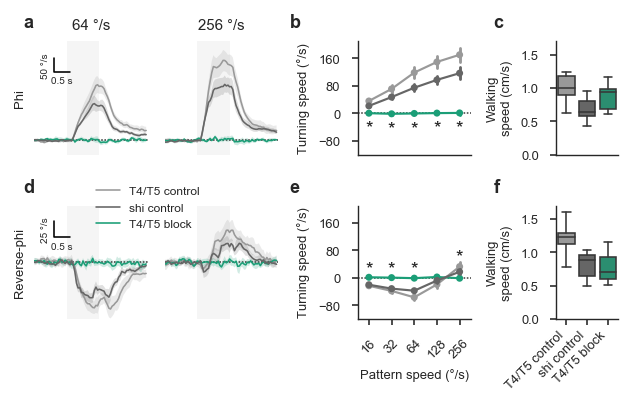

In [86]:
behavior_figure(lambda_pick=90.0)